In [1]:
#https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

#libraries
# Importad las librerías necesarias aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                             silhouette_score, davies_bouldin_score,silhouette_samples)
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


Attributes

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* (0/1)Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* (0/1)AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* (0/1)AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* (0/1)AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* (0/1)AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* (0/1)AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* (0/1)Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month*

# Preprocessing

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jorgecalvar/project-client-segmentation/main/marketing_campaign.csv',header=0,sep='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(len(numerical_features) , numerical_features)
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(len(categorical_features) , categorical_features)

df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(exclude='number')

26 ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
3 ['Education', 'Marital_Status', 'Dt_Customer']


### Categorical variables

As we observe there are only 3 non numerical variables

2 are categorical: Education and Marital_status

Dt_Customer is a date which we will treat later

In [5]:
df[categorical_features].describe(include=object).T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663  31-08-2012    12

In [6]:
print(df.Marital_Status.value_counts())
print(df.Education.value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


### Numerical Variables

In [7]:
df[numerical_features].describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [8]:
above_0_missing = df.isnull().sum() > 0
percentage = df.isnull().sum()/df.isnull().count() 
pd.concat([df.isnull().sum()[above_0_missing], percentage[above_0_missing]], axis=1, keys=['Total', 'Percentage'])

Total  Percentage
Income     24    0.010714

 24 values missing in the Income variable which is 1%.

 To treat them we will substitute for the mean

In [9]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [10]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\jorge\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\jorge\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [11]:
print(df_num.Z_CostContact.value_counts())
print(df_num.Z_Revenue.value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


We observe two variables which are the same for every row so we can eliminate them

In [12]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

In [13]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

### More variable preprocessing

#### Offer campaigns, binary variables

We se here, and also by reading the info on the dataset, that there are many binary variables 0/1

(0/1)Complain: 1 if the customer complained in the last 2 years, 0 otherwise

(0/1)AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

(0/1)AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

(0/1)AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

(0/1)AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

(0/1)AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

(0/1)Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [14]:
df['SumAcceptedCmp'] =  df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] +df['Response']
print(df.SumAcceptedCmp.value_counts())

0    1631
1     370
2     142
3      51
4      36
5      10
Name: SumAcceptedCmp, dtype: int64


In [15]:
px.histogram(df, x="SumAcceptedCmp", color="SumAcceptedCmp", title=" Sum of offers accepted by customer")

We wanted to check whether customers could accept multiple offers, we see that they can.
We see accepting more offers is less likely

#### Date visualization

In [16]:
type(df.Dt_Customer[1])

str

In [17]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [18]:
#new feature
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)

df["days"] = days

In [19]:
fig = make_subplots(rows = 1,
                    cols = 2,
                    subplot_titles=("Dates distribution", "days since enrolment"))


# primer gráfico: Histograma de valores de las notas de writing
fig.add_trace(
    go.Histogram(
        x = df["Dt_Customer"],

        showlegend = False
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(
        x = df["days"], 
        showlegend = False,
        xbins=dict(
            start= 0,
            end= 1100,
            size=27
        ),        
    ),
    row = 1,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

In terms of enrollment we se how most people enrolled after summer 2012 and until summer 2014. This means in terms of days of enrollment that most people about 200-800 days. Uf we look closely we see how both distributions are the same but reflected, since date of enrollment is the inverse of days since enrollment.

#### Age Visualization

In [20]:
df["Age"] = 2014-df.Year_Birth

In [21]:
fig = make_subplots(rows = 1,
                    cols = 2,
                    subplot_titles=("Year of birth distribution", "Age distribution"))


# primer gráfico: Histograma de valores de las notas de writing
fig.add_trace(
    go.Histogram(
        x = df["Year_Birth"],

        showlegend = False
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(
        x = df["Age"], 
        showlegend = False,
        
    ),
    row = 1,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

Most people are between 36 and 50 years old.
Again, distributions mirror each other since the age is inverse to the year of birth. We see some anomalies of people being over 115 years old but are limited and don't go too far into the impossible.

In [22]:
column_to_move= df.pop("Education")
df.insert(1, "Education",column_to_move)
column_to_move= df.pop("Marital_Status")
df.insert(2, "Marital_Status",column_to_move)

column_to_move=df.pop("Dt_Customer")
df.insert(3, "Dt_Customer", column_to_move)
column_to_move=df.pop("days")
df.insert(df.columns.get_loc("Dt_Customer")+1, "days", column_to_move)
column_to_move= df.pop("Age")
df.insert(df.columns.get_loc("Year_Birth")+1, "Age",column_to_move)

In [23]:
df['Relationship'] = df['Marital_Status']
df['Relationship'] = df['Relationship'].replace(['Married', 'Together'],'Relationship')
df['Relationship'] = df['Relationship'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
column_to_move=df.pop("Relationship")
df.insert(df.columns.get_loc("Marital_Status")+1, "Relationship", column_to_move)

df['GradorPost'] = df['Education']
df['GradorPost'] = df['GradorPost'].replace(['Graduation', 'Basic'],'Undergrad Degree')
df['GradorPost'] = df['GradorPost'].replace(['PhD', 'Master', '2n Cycle'],'PostGrad Degree')
column_to_move=df.pop("GradorPost")
df.insert(df.columns.get_loc("Education")+1, "GradorPost", column_to_move)

## Exploration 

In [24]:
df.head(3)

ID   Education        GradorPost Marital_Status  Relationship  \
0  5524  Graduation  Undergrad Degree         Single        Single   
1  2174  Graduation  Undergrad Degree         Single        Single   
2  4141  Graduation  Undergrad Degree       Together  Relationship   

  Dt_Customer  days  Year_Birth  Age   Income  ...  NumStorePurchases  \
0  2012-04-09   971        1957   57  58138.0  ...                  4   
1  2014-08-03   125        1954   60  46344.0  ...                  2   
2  2013-08-21   472        1965   49  71613.0  ...                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  SumAcceptedCmp  
0             0         0         1               1  
1             0         0         0               0  
2             0         0         0               0  

[3 rows x 32 columns]

### Overview

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Dt_Customer'}>,
        <AxesSubplot:title={'center':'days'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'N

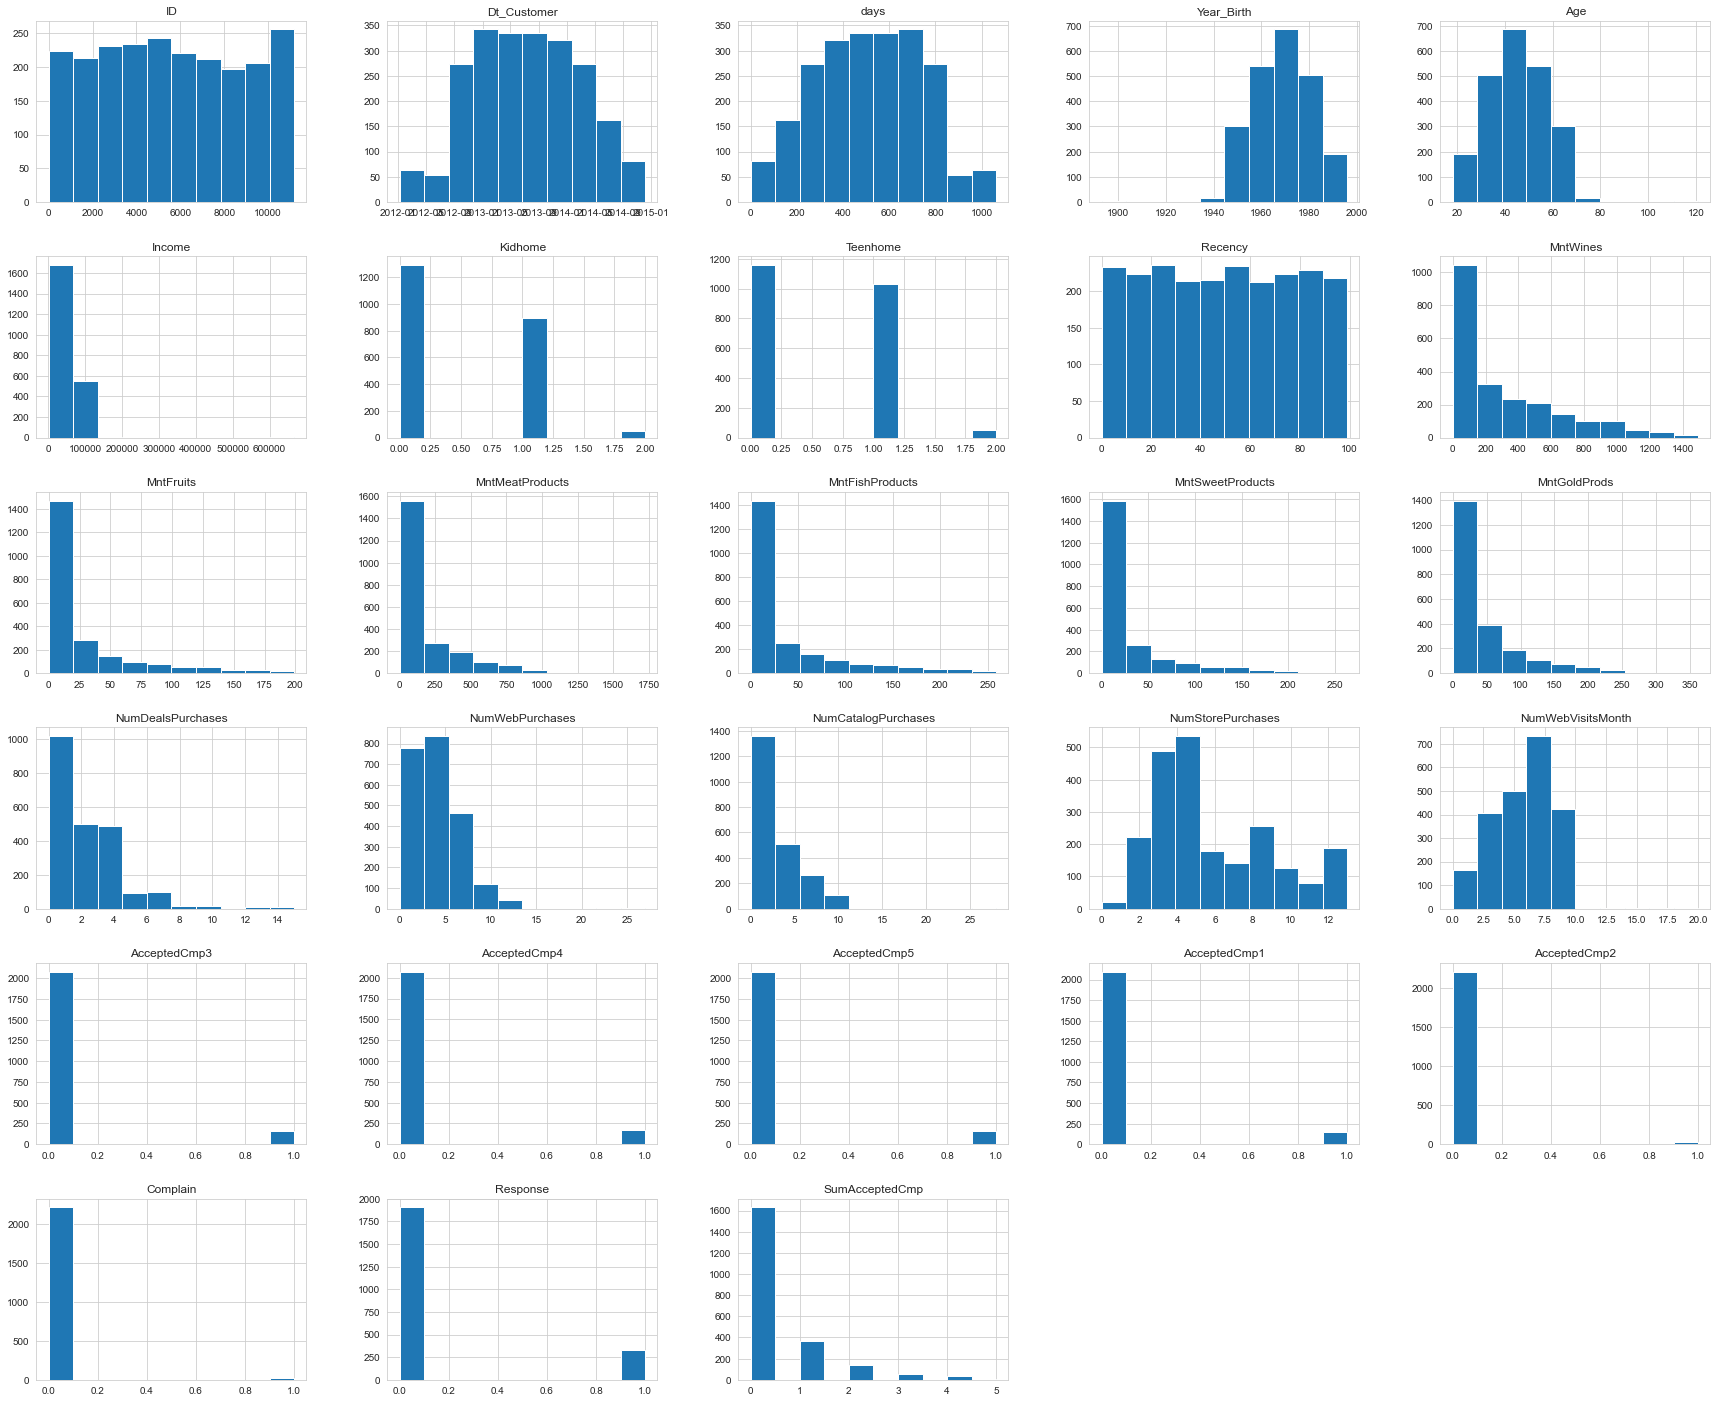

In [25]:
pd.options.plotting.backend = "matplotlib"
df.loc[:, df.columns].hist(figsize=(30, 25))

In [26]:
dfhist=df.iloc[:, 6:-1].loc[:, df.iloc[:, 6:-1].columns != 'Year_Bipd.size(rth'] 
dfhist.shape

(2240, 25)

#### All variable distributions: histograms

In [27]:
df.Income[df.Income > 115000] = 115000

In [28]:
features = [x for x in dfhist.columns]

fig = make_subplots(rows = 5, cols = 5, subplot_titles = (features))

#Preparo la estructura de filas y columnas para asignar
rows = np.repeat([1,2,3,4,5], 5)
cols = [1,2,3,4,5]*5

# Creo secuencialmente la figura con un loop
for feature, row, col in zip(features,rows,cols):
    if feature == features[-1]:
        showlegend = True
    else:
        showlegend = False
        
    fig.add_trace(
        go.Histogram(
            x = df[feature],
            xbins=dict(
                start=df[feature].min()-1,
                end=df[feature].max()+1,
                size=(df[feature].max() - df[feature].min())/30
            ),
        name = feature,showlegend = False
        ),
        row = row,
        col = col
    )
    
fig.update_layout(title = "Histograms ",bargap=0.1,barmode = "overlay",
                  height = 1300, width = 1000)

fig.show()

From this visuzalization we can see at a glance all the distributions in numerical variables.

#### Categorical visualizations

In [29]:
fig = make_subplots(rows = 2,
                    cols = 2,
                    specs=[[{"type": "histogram"},{"type": "pie"}],[{"type": "histogram"},{"type": "pie"}]],
                    subplot_titles=("Marital Status distribution", "Relationship", "Education distribution", "Grad or Postgrad"))


fig.add_trace(
    go.Histogram(
        x = df.Marital_Status,
        showlegend = False,
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Pie(
        labels=df.Relationship.value_counts().index.tolist(), 
        values=df.Relationship.value_counts().tolist(),
    ),
    row = 1,
    col = 2
)
fig.add_trace(
    go.Histogram(
        x = df.Education,
        showlegend = False,
    ),
    row = 2,
    col = 1
)

fig.add_trace(
    go.Pie(
        labels=df.GradorPost.value_counts().index.tolist(), 
        values=df.GradorPost.value_counts().tolist(),
     
    ),
    row = 2,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

In [30]:
print(df.GradorPost.value_counts().index.tolist())
print(df.GradorPost.value_counts().tolist())

['Undergrad Degree', 'PostGrad Degree']
[1181, 1059]


Since there where too many categories and some meant very similar things, specially in the marital status variable, we decided to simplify these variables to understand better the distribution of people.

In [31]:
px.histogram(df, x="Education", color="Marital_Status", title="Education vs Marital Status all categories")

The different proportions are unclear, lets go with an easier graph.

On the graph below we see no difference with proportions of single people and those in a relationship being practically the same in both education groups.

In [32]:
px.histogram(df, x="GradorPost", color="Relationship", title="Relationship vs Grad or Postgrad degree")

No difference

#### All variable correlation: heatmap

In [33]:
# Una versión con Plotly
corr = df.iloc[:, 6:-1].corr()

z = round(corr,2).values
for i in range(z.shape[0]):
    if i == (z.shape[0] - i - 1):
        break
    z[[i,(z.shape[0]-i-1)],:] = z[[(z.shape[0]-i-1),i],:]

x = [x for x in df.iloc[:, 6:-1].columns]
y = [x for x in df.iloc[:, 6:-1].columns ]
y.reverse()

z_text = [[str(y) for y in x] for x in z]

heatmap = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='icefire', showscale=True )

heatmap.show()

#### Mtn ScatterPlots

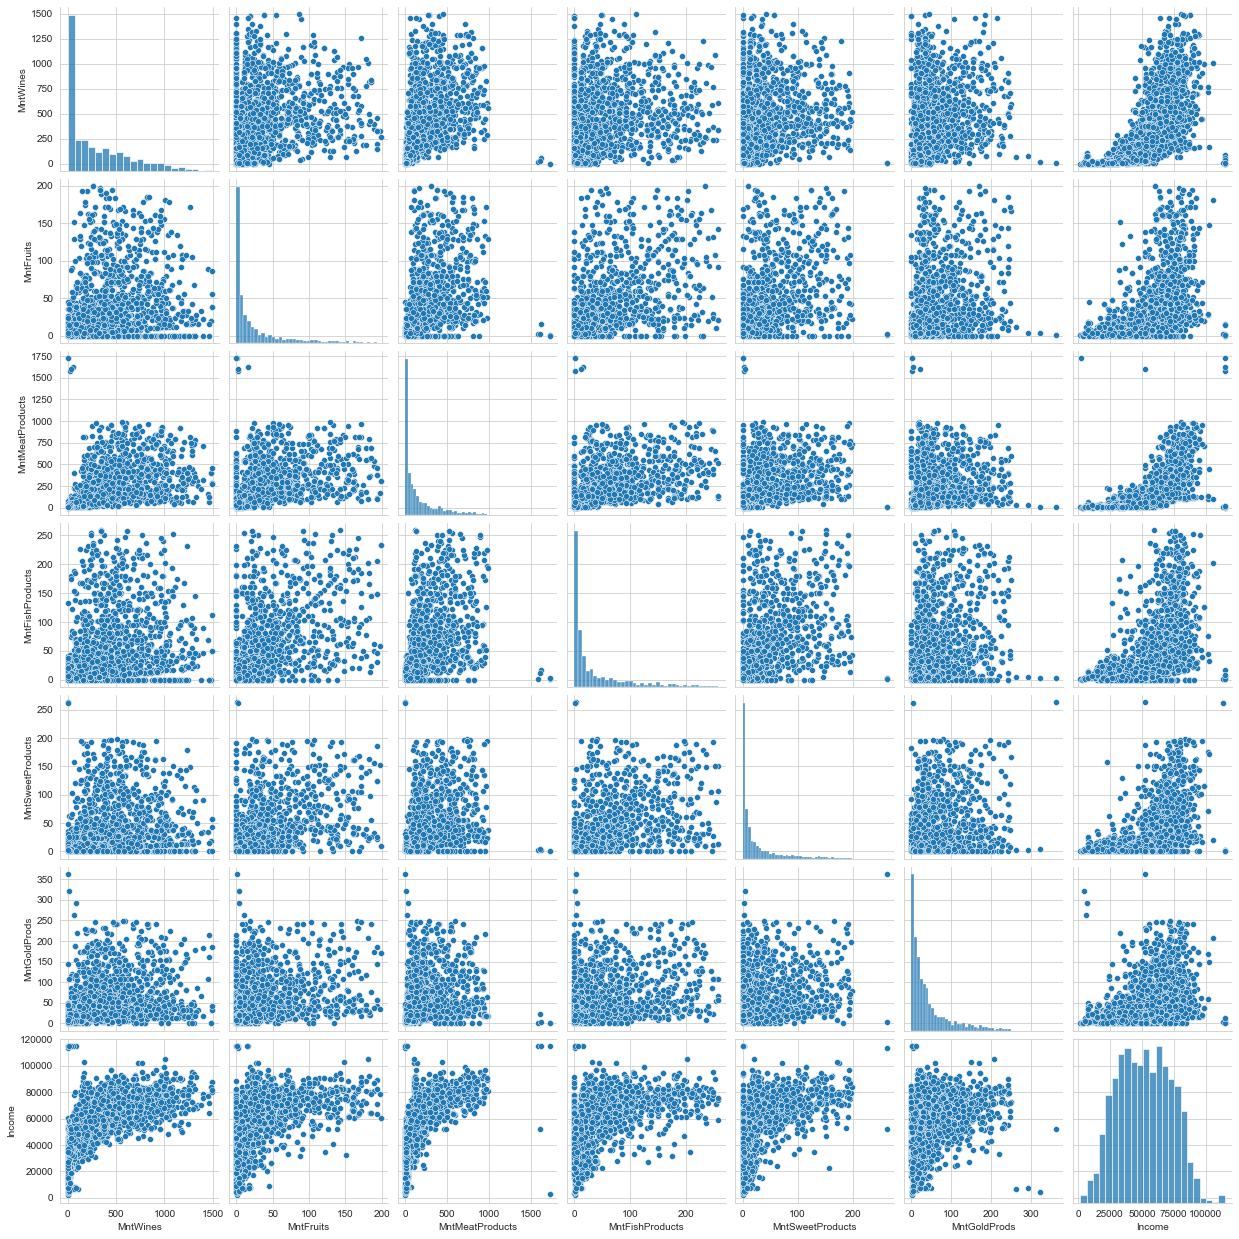

In [34]:
dfMnt=df.iloc[:, 13:19]
dfMnt['Income']=df.Income
sns.pairplot(dfMnt)

#### Income ScatterPlots with related variables

In [35]:
fig = make_subplots(rows = 4,
                    cols = 3,
                    subplot_titles=("MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 
                                    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Kidhome"))


fig.add_trace(
    go.Scatter(
        x = df.MntWines,
        y = df.Income,
        name = 'MntWines',
        mode = "markers",
        dy=5000
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Scatter(
        x = df.MntFruits,
        y = df.Income,
        name = 'MntFruits',
        mode = "markers",
    ),
    row = 1,
    col = 2
)
fig.add_trace(
    go.Scatter(
        x = df.MntMeatProducts,
        y = df.Income,
        name = 'MntMeatProducts',
        mode = "markers",
    ),
    row = 1,
    col = 3
)
fig.add_trace(
    go.Scatter(
        x = df.MntFishProducts,
        y = df.Income,
        name = 'MntFishProducts',
        mode = "markers",
    ),
    row = 2,
    col = 1
)
fig.add_trace(
    go.Scatter(
        x = df.MntSweetProducts,
        y = df.Income,
        name = 'MntSweetProducts',
        mode = "markers",
    ),
    row = 2,
    col = 2
)
fig.add_trace(
    go.Scatter(
        x = df.MntGoldProds,
        y = df.Income,
        name = 'MntGoldProds',
        mode = "markers",
    ),
    row = 2,
    col = 3
)
fig.add_trace(
    go.Scatter(
        x = df.NumWebPurchases,
        y = df.Income,
        name = 'NumWebPurchases',
        mode = "markers",
    ),
    row = 3,
    col = 1
)


fig.add_trace(
    go.Scatter(
        x = df.NumCatalogPurchases,
        y = df.Income,
        name = 'NumCatalogPurchases',
        mode = "markers",
    ),
    row = 3,
    col = 2
)

fig.add_trace(
    go.Scatter(
        x = df.NumStorePurchases,
        y = df.Income,
        name = 'NumStorePurchases',
        mode = "markers",
    ),
    row = 3,
    col = 3
)

fig.add_trace(
    go.Scatter(
        x = df.NumWebVisitsMonth,
        y = df.Income,
        name = 'NumWebVisitsMonth',
        mode = "markers",
    ),
    row = 4,
    col = 1
)
fig.add_trace(
    go.Scatter(
        x = df.Kidhome,
        y = df.Income,
        name = 'Kidhome',
        mode = "markers",
    ),
    row = 4,
    col = 2
)



fig.update_layout(autosize=False,width=1000,height=1500)
fig.show()

As we saw on the correlation coefficients. The first 9 plots show a positive relation between the chosen variable and Income while the last two NumWebVisitsPerMonth and Kidhome show negative relation.

Amount Sums

In [36]:
dfMntSum=pd.DataFrame(df.iloc[:, 13:19].sum(axis=0))
dfMntSum['Mnt'] = dfMntSum.index
dfMntSum.columns=['Total Amount spent','Category of products']
dfMntSum
fig =px.bar(dfMntSum, x='Category of products', y='Total Amount spent', color='Category of products')
fig.update_layout(showlegend=False)

We see much more money being spent on wines and meat products

In [37]:
df.to_csv( sep=',', encoding='utf-8')

    

',ID,Education,GradorPost,Marital_Status,Relationship,Dt_Customer,days,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumAcceptedCmp\r\n0,5524,Graduation,Undergrad Degree,Single,Single,2012-04-09,971,1957,57,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1\r\n1,2174,Graduation,Undergrad Degree,Single,Single,2014-08-03,125,1954,60,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0\r\n2,4141,Graduation,Undergrad Degree,Together,Relationship,2013-08-21,472,1965,49,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0\r\n3,6182,Graduation,Undergrad Degree,Together,Relationship,2014-10-02,65,1984,30,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0\r\n4,5324,PhD,PostGrad Degree,Married,Relationship,2014-01-19,

In [38]:
df

ID   Education        GradorPost Marital_Status  Relationship  \
0      5524  Graduation  Undergrad Degree         Single        Single   
1      2174  Graduation  Undergrad Degree         Single        Single   
2      4141  Graduation  Undergrad Degree       Together  Relationship   
3      6182  Graduation  Undergrad Degree       Together  Relationship   
4      5324         PhD   PostGrad Degree        Married  Relationship   
...     ...         ...               ...            ...           ...   
2235  10870  Graduation  Undergrad Degree        Married  Relationship   
2236   4001         PhD   PostGrad Degree       Together  Relationship   
2237   7270  Graduation  Undergrad Degree       Divorced        Single   
2238   8235      Master   PostGrad Degree       Together  Relationship   
2239   9405         PhD   PostGrad Degree        Married  Relationship   

     Dt_Customer  days  Year_Birth  Age   Income  ...  NumStorePurchases  \
0     2012-04-09   971        1957   57  58138.0  ...                  4   
1     2014-08-03   125        1954   60  46344.0  ...                  2   
2     2013-08-21   472        1965   49  71613.0  ...                 10   
3     2014-10-02    65        1984   30  26646.0  ...                  4   
4     2014-01-19   321        1981   33  58293.0  ...                  6   
...          ...   ...         ...  ...      ...  ...                ...   
2235  2013-06-13   541        1967   47  61223.0  ...                  4   
2236  2014-10-06    61        1946   68  64014.0  ...                  5   
2237  2014-01-25   315        1981   33  56981.0  ...                 13   
2238  2014-01-24   316        1956   58  69245.0  ...                 10   
2239  2012-10-15   782        1954   60  52869.0  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  SumAcceptedCmp  
0                0             0         0         1               1  
1                0             0         0         0               0  
2                0             0         0         0               0  
3                0             0         0         0               0  
4                0             0         0         0               0  
...            ...           ...       ...       ...             ...  
2235             0             0         0         0               0  
2236             1             0         0         0               1  
2237             0             0         0         0               1  
2238             0             0         0         0               0  
2239             0             0         0         1               1  

[2240 rows x 32 columns]